# Machine Learning Internship by Aspiration.ai

# Module 3

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Problem 3.1

In [257]:
gold = pd.read_csv('GOLD.csv')
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [258]:
gold.shape

(512, 9)

In [259]:
np.where(pd.isnull(gold[['Pred', 'new']]))

(array([411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
        424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
        437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
        450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
        502, 503, 504, 505, 506, 507, 508, 509, 510, 511], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [260]:
gold['Date'] = gold['Date'].astype('datetime64')
gold.set_index('Date',inplace = True)
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [261]:
df_filled = gold.dropna()
df_tofill = gold.iloc[411 : ,:]
df_filled.info()
print("\n*****************************************************************************************************************\n")
df_tofill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 2017-05-04 to 2018-12-10
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     411 non-null    int64  
 1   Open      411 non-null    int64  
 2   High      411 non-null    int64  
 3   Low       411 non-null    int64  
 4   Vol.      411 non-null    object 
 5   Change %  411 non-null    object 
 6   Pred      411 non-null    float64
 7   new       411 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 28.9+ KB

*****************************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2018-12-11 to 2019-05-03
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     101 non-null    int64  
 1   Open      101 non-null    int64  
 2   High      101 non-null  

In [262]:
df_filled

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
2018-12-04,30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
2018-12-05,30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
2018-12-06,31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


In [263]:
df_tofill

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [264]:
X = df_filled[['Price','Open', 'High', 'Low']].values
pred = df_filled[['Pred']].values
new = df_filled[['new']].values

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [266]:
pred_model = LinearRegression().fit(X,pred)
new_model = LinearRegression().fit(X,new)
print("Pred Summary : ")
print("pred coefficients : ",pred_model.coef_,"\npred intercept : ",pred_model.intercept_)
print("score of pred using simple linear regression : ",pred_model.score(X,pred))
print("\nnew summary : ")
print("new coefficients : ",new_model.coef_,"\nnew intercept : ",new_model.intercept_)
print("score of new using simple linear regression : ",new_model.score(X,new))

Pred Summary : 
pred coefficients :  [[ 2.  3. -1. -4.]] 
pred intercept :  [-2.67164069e-12]
score of pred using simple linear regression :  1.0

new summary : 
new coefficients :  [[ 1.01202641 -1.00094252  1.00492221 -1.01604305]] 
new intercept :  [-0.21616304]
score of new using simple linear regression :  0.9999941203360704


In [267]:
model = Pipeline([('poly',PolynomialFeatures(degree = 2)), ('linear', LinearRegression())])
model.fit(X,new)
print("degree 2 score of new : ", model.score(X,new))
print("This is greater than the score that we got when trained normally using the features")

degree 2 score of new :  0.999999995684109
This is greater than the score that we got when trained normally using the features


### We can clearly interpret from summary that <i>pred</i> is in linear relationship with the OHLC whereas  <i>new</i> is polynomial to OHLC

In [268]:
predictions = pred_model.predict(df_tofill[['Price','Open', 'High', 'Low']])
gold.loc[411:,'Pred'] = predictions
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305


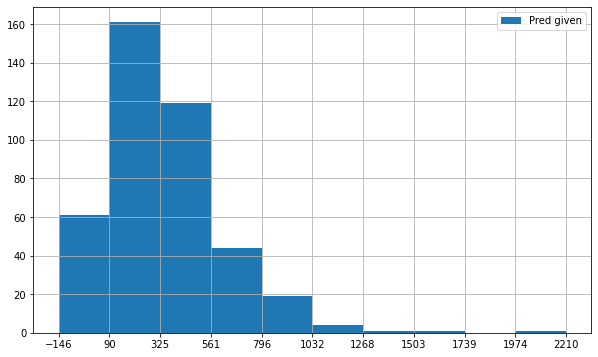

In [269]:
count,bin_edges = np.histogram(df_filled['Pred'])
df_filled['Pred'].hist(figsize = (10,6), label = 'Pred given')

plt.xticks(bin_edges)
plt.legend()

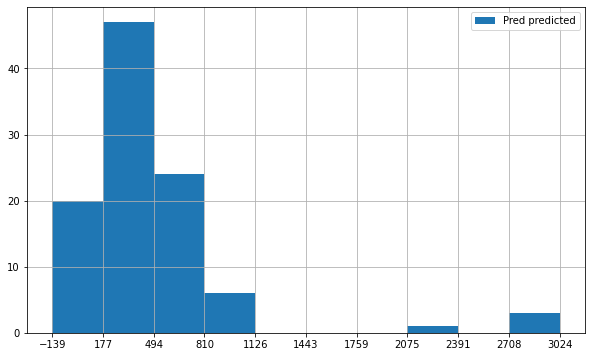

In [270]:
count,bin_edges = np.histogram(df_tofill['Pred'])
df_tofill['Pred'].hist(figsize = (10,6), label = 'Pred predicted')

plt.xticks(bin_edges)
plt.legend()

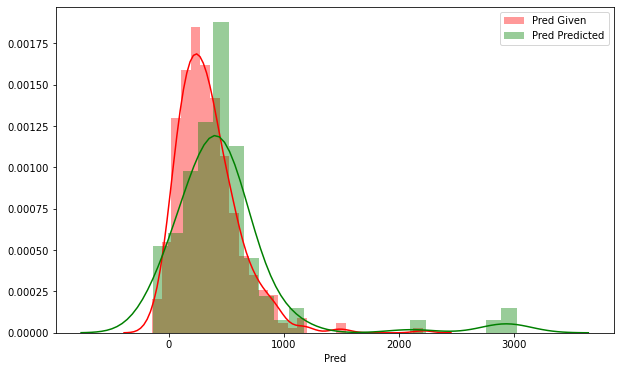

In [271]:
plt.figure(figsize = (10,6))
ax = sns.distplot(df_filled['Pred'],color = 'red', label = 'Pred Given')
ax = sns.distplot(df_tofill['Pred'],color = 'green', label = 'Pred Predicted')

plt.legend()
plt.show()

### Problem 3.2

In [272]:
itc = pd.read_csv('ITC.csv')
nifty = pd.read_csv('Nifty50.csv')

In [273]:
itc.info()
print("\n****************************************************************************************************************\n")
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  496 non-null    object 
 1   Series                  496 non-null    object 
 2   Date                    496 non-null    object 
 3   Prev Close              496 non-null    float64
 4   Open Price              496 non-null    float64
 5   High Price              496 non-null    float64
 6   Low Price               496 non-null    float64
 7   Last Price              496 non-null    float64
 8   Close Price             496 non-null    float64
 9   Average Price           496 non-null    float64
 10  Total Traded Quantity   496 non-null    int64  
 11  Turnover                496 non-null    float64
 12  No. of Trades           496 non-null    int64  
 13  Deliverable Qty         496 non-null    int64  
 14  % Dly Qt to Traded Qty  496 non-null    fl

In [274]:
itc = itc[itc['Series'] == 'EQ']
itc['Date'] = itc['Date'].astype('datetime64')
itc.set_index('Date', inplace = True)
itc

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
2019-05-08,ITC,EQ,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
2019-05-09,ITC,EQ,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35


In [275]:
nifty['Date'] = nifty['Date'].astype('datetime64')
nifty.set_index('Date', inplace =True)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [276]:
index = nifty["Close"].where(itc.index == nifty.index)
index_return = (index.pct_change()*100).dropna().values.reshape(-1, 1)
X_index = index_return[len(index_return)-90 : ].reshape(-1,1)

stock = itc["Close Price"].where(itc.index == nifty.index)
stock_return = (stock.pct_change()*100).dropna().values.reshape(-1, 1)
y_stock = stock_return[len(stock_return)-90 : ].reshape(-1,1)

In [277]:
Market_Regression_Model = LinearRegression().fit(X_index, y_stock)
print("The daily Beta value for the past 3 months using Regression : ", Market_Regression_Model.coef_[0][0])

The daily Beta value for the past 3 months using Regression :  0.8274858020189683


In [278]:
cov_matrix = np.cov(index_return[len(index_return)-90 : ].reshape(1,-1), stock_return[len(stock_return)-90 : ].reshape(1,-1))
print(cov_matrix)

[[0.4713252  0.39001491]
 [0.39001491 1.2335984 ]]


In [279]:
beta = cov_matrix[0][1]/cov_matrix[0][0]
print("The daily Beta value for the past 3 months using Formula : ",beta)

The daily Beta value for the past 3 months using Formula :  0.8274858020189683


In [280]:
index_month = index.loc[index.groupby(index.index.to_period('M')).apply(lambda x : x.index.max())]
index_month_returns = (index_month.pct_change()*100).dropna().values.reshape(-1,1)

stock_month = stock.loc[stock.groupby(index.index.to_period('M')).apply(lambda x : x.index.max())]
stock_month_returns = (stock_month.pct_change().dropna()*100).values.reshape(-1,1)

In [281]:
Market_Regression_Model_monthly = LinearRegression().fit(index_month_returns,stock_month_returns)
print("The Monthly Beta Value by Regression : ",Market_Regression_Model_monthly.coef_[0][0])

The Monthly Beta Value by Regression :  0.8566225606444712


In [282]:
cov_matrix_monthly = np.cov((index_month.pct_change()*100).dropna().values.reshape(1,-1), (stock_month.pct_change()*100).dropna().values.reshape(1,-1))
print(cov_matrix_monthly)

[[16.74932559 14.34785018]
 [14.34785018 33.38290394]]


In [283]:
beta_monthly = cov_matrix_monthly[0][1]/cov_matrix_monthly[0][0]
print("The Monthly Beta Value by Formula : ",beta_monthly)

The Monthly Beta Value by Formula :  0.8566225606444711


### My Inferences : 

* The daily <b>Beta</b> value of <b>ITC </b> around the last <b>3 Months</b> is approx. <b>0.83</b>, which lies between <b>0 and 1</b>, so we can conclude that the stock is <b>less Volatile than the Market</b>

* The  monthly <b>Beta</b> value of <b>ITC</b>  is approx. <b>0.86</b> which lies between <b>0 and 1</b>, so we can conclude that the stock is <b>less Volatile than the Market</b>

* <b>Negative beta</b>, A beta less than 0, which would indicate an <b>inverse relation to the market</b>.